In [1]:
## import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# For Data Visualization. 
import matplotlib.pyplot as plt 
import seaborn as sns 

# For Options 
pd.set_option('display.max_rows' , None)
pd.set_option('display.max_columns' , None)

# For Warnings 
import warnings
warnings.filterwarnings('ignore')

# For Preprocessing 
from sklearn.preprocessing import  StandardScaler , OneHotEncoder 

# For Transformer. 
from sklearn.compose import ColumnTransformer 

# Train test splitting and hyperparameter tunning. 
from sklearn.model_selection import train_test_split , GridSearchCV 

# Model building 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier , AdaBoostClassifier 
from sklearn.neighbors import KNeighborsClassifier 

# For Dimensionality Reduction i,e PCA. 
from sklearn.decomposition import PCA 

# Pipelines. 
from sklearn.pipeline import Pipeline 

# Metrics 
from sklearn.metrics import classification_report , mean_squared_error

import pickle
import joblib
import numpy as np

In [2]:
# load and understand data
filepath = './Crop_recommendation.csv'
data_import = pd.read_csv(filepath)

data_import.head()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label,Unnamed: 8,Unnamed: 9
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,NaN,NaN
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,NaN,NaN
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,NaN,NaN
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,NaN,NaN
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,NaN,NaN


In [3]:
# Drop Unwanted columns. 

df = data_import.drop(['Unnamed: 8' , 'Unnamed: 9'] , axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   phosphorus   2200 non-null   int64  
 2   potassium    2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [4]:
#Нет пропущенных значений
#Все столбцы числовые, кроме label

#### Data Visualization.

In [5]:
data_viz_df = df.copy()
data_viz_df.head()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


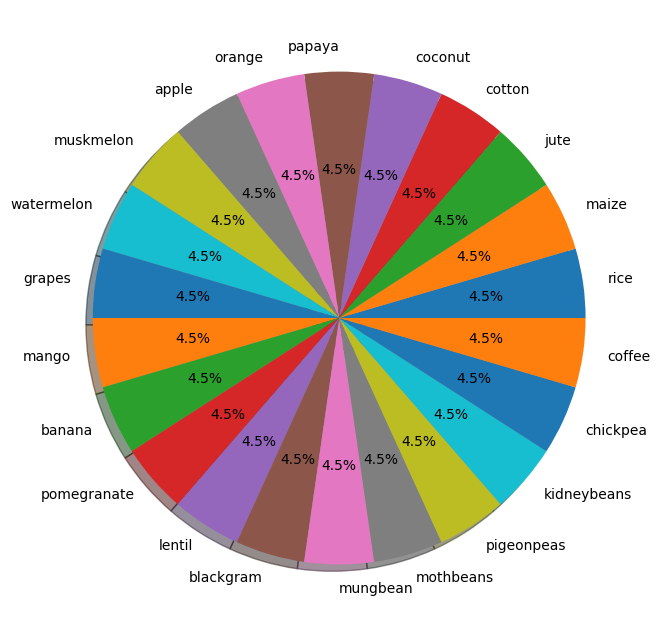

In [6]:
label_name = data_viz_df['label'].value_counts().index
val = data_viz_df['label'].value_counts().values


plt.figure(figsize = (8,8))
plt.pie(x = val , labels  = label_name , shadow = True , autopct = '%1.1f%%')
plt.show()

<AxesSubplot: xlabel='label', ylabel='count'>

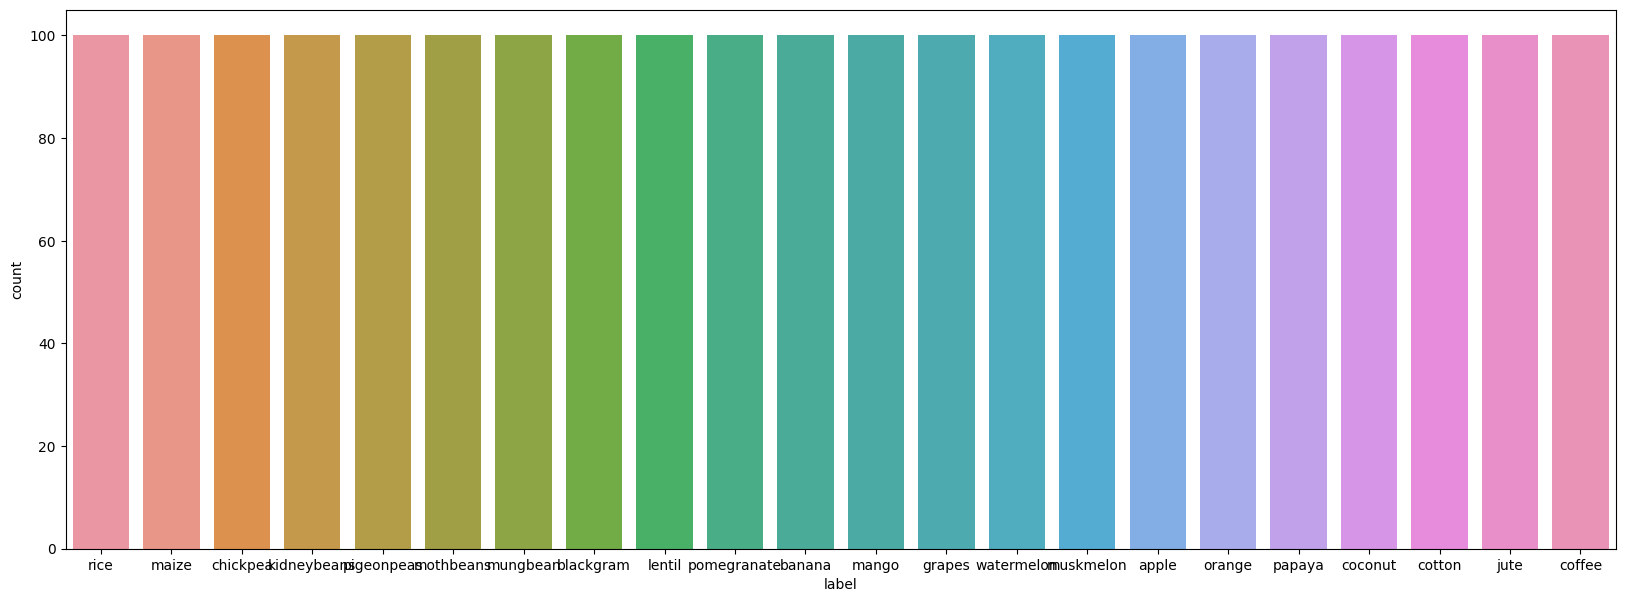

In [7]:
# Круговая диаграмма для столбца Label. 

plt.figure(figsize = (20 , 7))
sns.countplot(x = 'label' , data = data_viz_df)

In [8]:
#Вывод: Все значения в label одинаковы.

In [9]:
def col_groupby(df , col , target) : 
    max_label = df.groupby(target)[col].max().sort_values()[-1:].index[0]
    max_val = df.groupby(target)[col].max().sort_values()[-1:].values[0]

    min_label = df.groupby(target)[col].min().sort_values()[-1:].index[0]
    min_val = df.groupby(target)[col].min().sort_values()[-1:].values[0]
    
    return max_label , max_val , min_label , min_val

max_label , max_val , min_label , min_val = col_groupby(df , 'rainfall' , 'label')
print(f"Максимальное количество осадков, необходимое для выращивания {max_label}, составляет {max_val} .")
print(f"Минимальное количество осадков, необходимое для выращивания {min_label}, составляет {min_val} .")

max_label , max_val , min_label , min_val = col_groupby(df , 'temperature' , 'label')
print(f"Максимальная температура, необходимая для выращивания {max_label}, составляет {max_val} .")
print(f"Минимальная температура, необходимая для выращивания {min_label}, составляет {min_val} .")

max_label , max_val , min_label , min_val = col_groupby(df , 'ph' , 'label')
print(f"Максимальное значение PH, необходимое для выращивания {max_label}, составляет {max_val} .")
print(f"Минимальное значение PH, необходимое для выращивания {min_label}, составляет {min_val} .")

max_label , max_val , min_label , min_val = col_groupby(df , 'humidity' , 'label')
print(f"Максимальная влажность воздуха, необходимая для выращивания {max_label}, составляет {max_val} .")
print(f"Минимальная влажность воздуха, необходимая для выращивания {min_label}, составляет {min_val} .")

Максимальное количество осадков, необходимое для выращивания rice, составляет 298.5601175 .
Минимальное количество осадков, необходимое для выращивания rice, составляет 182.5616319 .
Максимальная температура, необходимая для выращивания papaya, составляет 43.67549305 .
Минимальная температура, необходимая для выращивания muskmelon, составляет 27.02415146 .
Максимальное значение PH, необходимое для выращивания mothbeans, составляет 9.93509073 .
Минимальное значение PH, необходимое для выращивания papaya, составляет 6.501521192 .
Максимальная влажность воздуха, необходимая для выращивания coconut, составляет 99.98187601 .
Минимальная влажность воздуха, необходимая для выращивания papaya, составляет 90.03863107 .


In [10]:
data_viz_df.columns

Index(['Nitrogen', 'phosphorus', 'potassium', 'temperature', 'humidity', 'ph',
       'rainfall', 'label'],
      dtype='object')

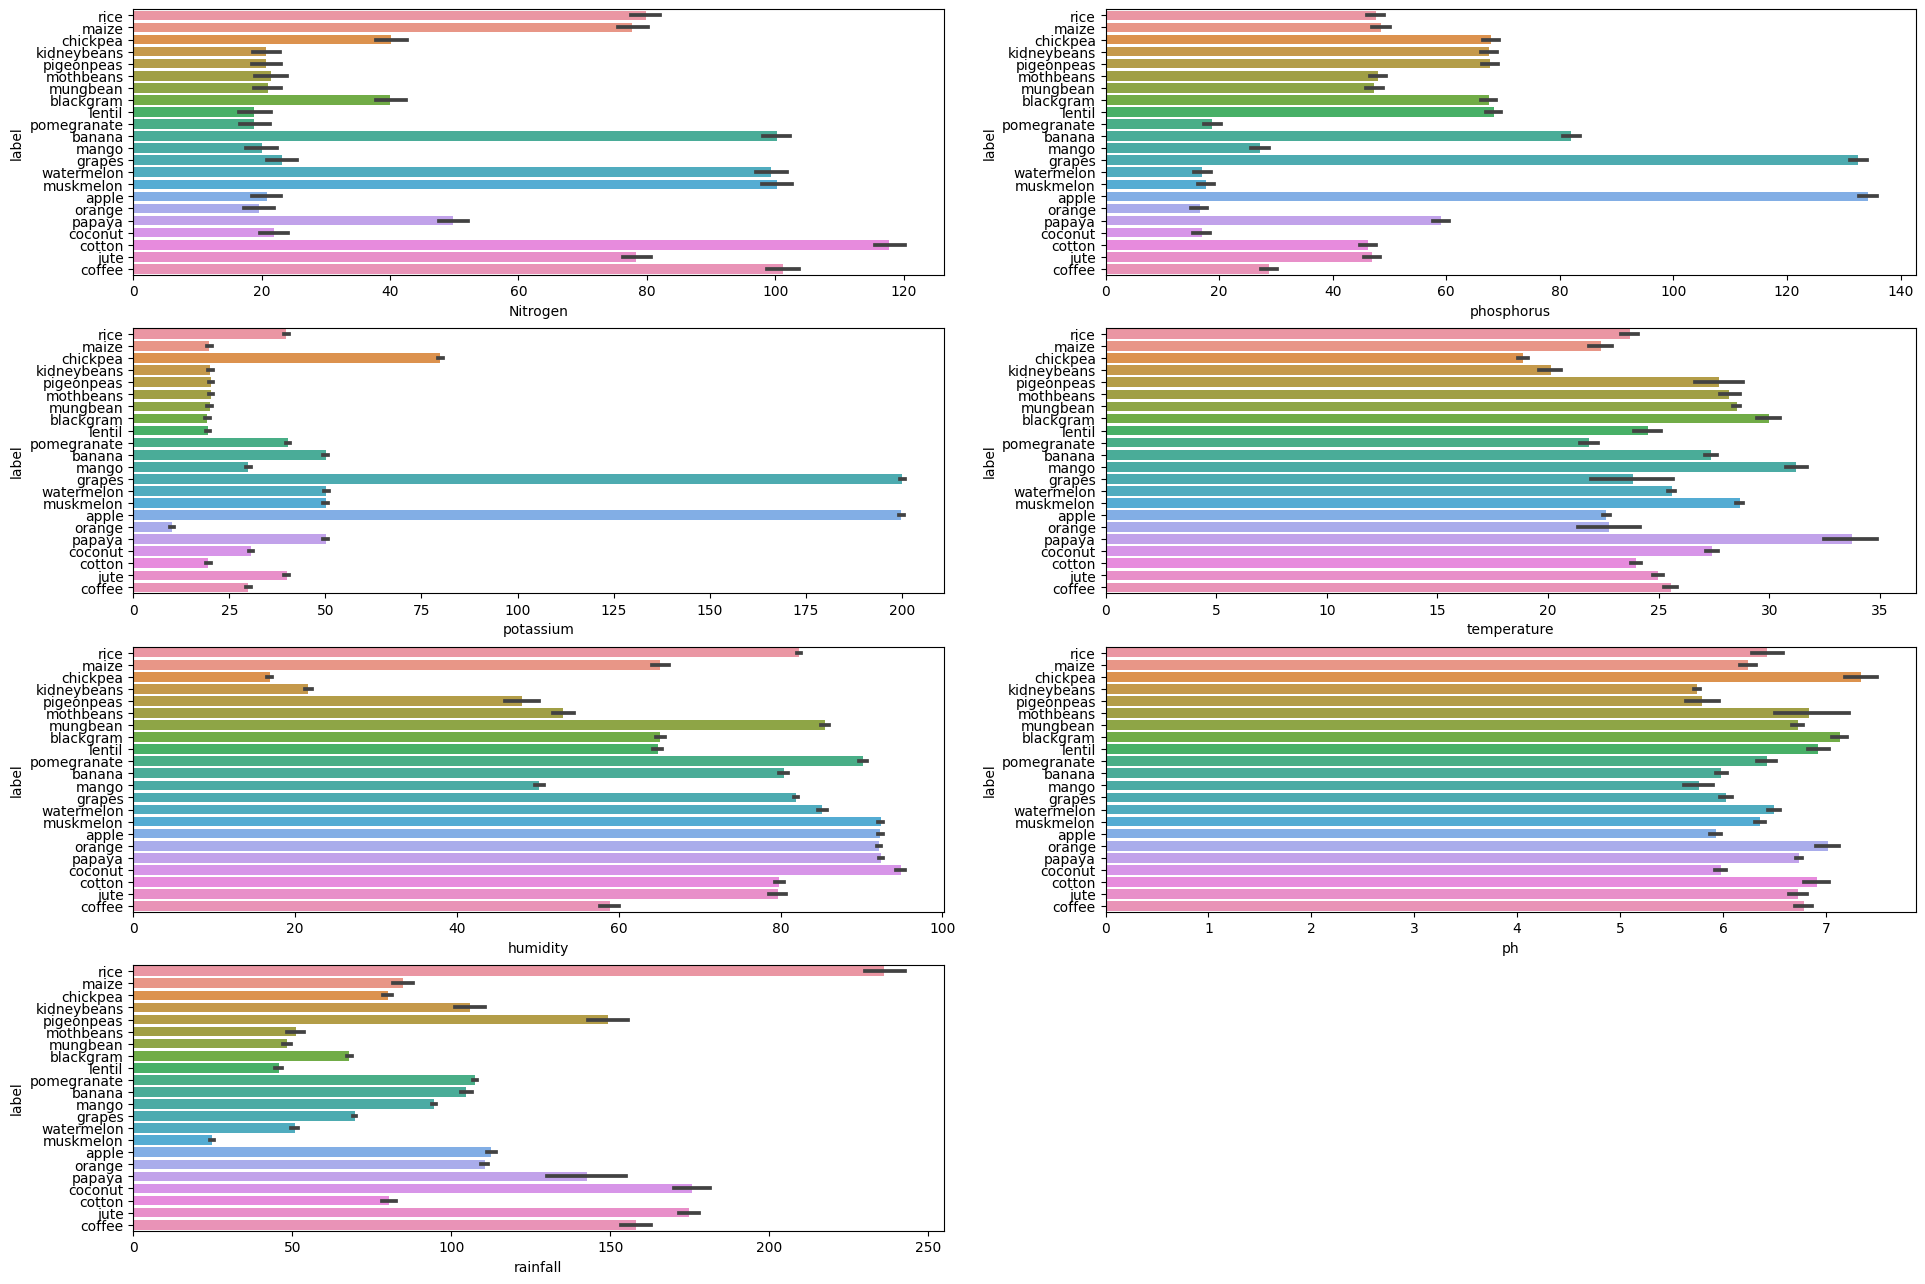

In [11]:
# Barplots (гистограммы). 

cols = ['Nitrogen', 'phosphorus', 'potassium', 'temperature', 'humidity', 'ph',
       'rainfall']
target = 'label'

def create_barplots(df , cols) :
    
    i = 1
    plt.figure(figsize = (23,20))
    for col_name in cols:
        plt.subplot(5,2,i)
        sns.barplot(data = df , x = col_name , y = target)
        i += 1 
        
create_barplots(df , cols)

In [12]:
# Хлопок требует больше азота по сравнению с другими культурами.
# Яблоня требует больше фосфора по сравнению с другими культурами.
# Виноград и яблоко требуют больше всего калия по сравнению с другими культурами.
# Апельсину требуется самая высокая температура по сравнению с другими культурами.
# Кокосовый орех требует высокой влажности по сравнению с другими культурами.
# Нут требует высокого уровня ph по сравнению с другими культурами.
# Рис требует наибольшего количества осадков по сравнению с другими культурами.

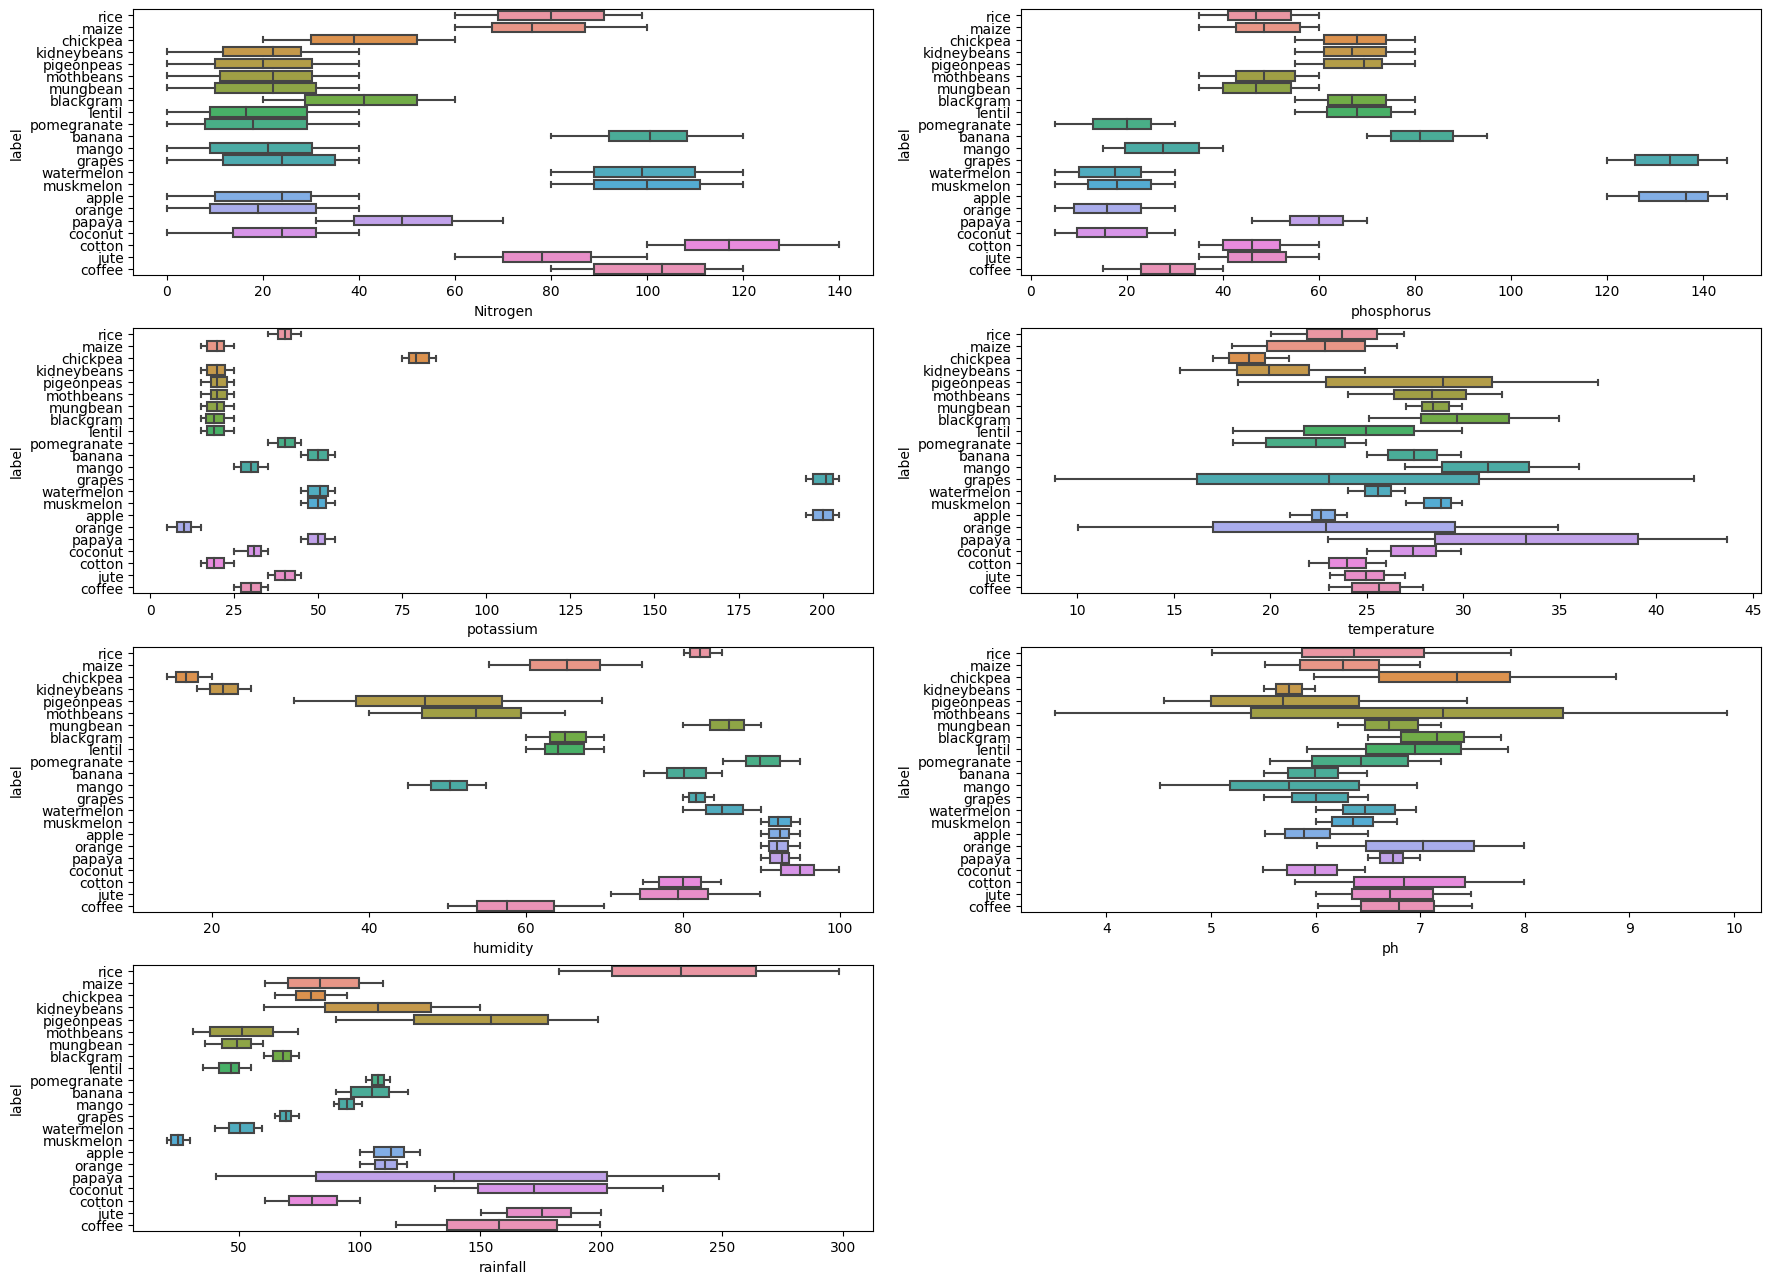

In [13]:
# Box-plots (коробчатые диаграммы). 

cols = ['Nitrogen', 'phosphorus', 'potassium', 'temperature', 'humidity', 'ph',
       'rainfall']
target = 'label'

def create_boxplots(df , cols) :
    
    i = 1
    plt.figure(figsize = (21,20))
    for col_name in cols:
        plt.subplot(5,2,i)
        sns.boxplot(data = df , x = col_name , y = target)
        i += 1 
        
create_boxplots(df , cols)

In [14]:
# Разделение характеристик и метки

In [15]:
features = df.drop('label' , axis = 1)
label = df['label']

In [16]:
# Разделение на тренировочную и тестовую часть. 

In [17]:
x_train , x_test , y_train , y_test = train_test_split(features , label , test_size = 0.2 , random_state = 42)

print(f"x train shape : {x_train.shape}\n y train shape : {y_train.shape} \n x test shape : {x_test.shape} \n y test shape : {y_test.shape}")

x train shape : (1760, 7)
 y train shape : (1760,) 
 x test shape : (440, 7) 
 y test shape : (440,)


In [18]:
# Предварительная обработка и построение моделей с помощью конвейеров.

In [19]:
lr_pipe = Pipeline(steps = [
    ('scaler' , StandardScaler()),
    ('lr_model' , LogisticRegression())
])

rf_pipe = Pipeline(steps = [
    ('scaler' , StandardScaler()) , 
    ('rf_model' , RandomForestClassifier())
])

gb_pipe = Pipeline(steps = [
    ('scaler' , StandardScaler()) , 
    ('gb_model' , GradientBoostingClassifier())
])

ab_pipe = Pipeline(steps = [
    ('scaler' , StandardScaler()) , 
    ('ab_model' , AdaBoostClassifier())
])

dt_pipe = Pipeline(steps = [
    ('scaler' , StandardScaler()) , 
    ('dt_model' , DecisionTreeClassifier())
])

knn_pipe = Pipeline(steps = [
    ('scaler' , StandardScaler()) , 
    ('knn_model', KNeighborsClassifier())
])

In [20]:
pipelines = [lr_pipe , rf_pipe , gb_pipe , ab_pipe , dt_pipe , knn_pipe]
model_names = ['Logistic Regression Classifier' , 'Random Forest Classifier' , 'Gradient Boosting Classifier','Adaboosting Classifier' , 'Decision Tree Clasifier' , 'KNearest Neighbors Classifier']


for pipe in pipelines : 
    pipe.fit(x_train , y_train)
    
# Comparing accuracies 
for index,val in enumerate(pipelines) : 
        print(f"{pipelines[index]} , test score : {val.score(x_test,y_test)}")

Pipeline(steps=[('scaler', StandardScaler()),
                ('lr_model', LogisticRegression())]) , test score : 0.9636363636363636
Pipeline(steps=[('scaler', StandardScaler()),
                ('rf_model', RandomForestClassifier())]) , test score : 0.9931818181818182
Pipeline(steps=[('scaler', StandardScaler()),
                ('gb_model', GradientBoostingClassifier())]) , test score : 0.9818181818181818
Pipeline(steps=[('scaler', StandardScaler()),
                ('ab_model', AdaBoostClassifier())]) , test score : 0.1409090909090909
Pipeline(steps=[('scaler', StandardScaler()),
                ('dt_model', DecisionTreeClassifier())]) , test score : 0.9840909090909091
Pipeline(steps=[('scaler', StandardScaler()),
                ('knn_model', KNeighborsClassifier())]) , test score : 0.9568181818181818


In [21]:
y_pred_rf = rf_pipe.predict(x_test)  # Делаем предсказания.

In [22]:
# Оценка метрик.¶

In [23]:
print(f"Отчет по классификации: {classification_report(y_test , y_pred_rf)}")

Отчет по классификации:               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
   

In [29]:
# save the model 
filename = './model.sav'
pickle.dump(rf_pipe, open(filename, 'wb')) 
  

In [31]:
filename_jl = './model_jl.sav'
joblib.dump(rf_pipe, open(filename_jl, 'wb')) 